<a href="https://colab.research.google.com/github/ocarane/ml_finished_projects/blob/main/Marcos_Guimar%C3%A3es_Classificacao_Marketing_Investimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação: Marketing em Investimentos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [163]:
import pandas as pd
dados = pd.read_csv("https://raw.githubusercontent.com/ocarane/ml_ClassificacaoMarketingInvestimento/main/marketing_investimento%20-%20marketing_investimento.csv.csv")
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [164]:
#elimindando dados nulos e inconsistentes


## Explorando os dados

Uma etapa muito importante em projetos de machine learning é a exploração e entendimento dos dados, conhecida como **análise exploratória**. Podemos utilizar gráficos para verificar quais são as informações em cada uma das colunas da base de dados, identificar inconsistências e padrões que possam existir.

Vamos explorar cada uma das colunas da base de dados com o uso da biblioteca `plotly`. Vamos começar pelas variáveis categóricas e depois explorar as variáveis numéricas.

### Variáveis categóricas

In [165]:
import plotly.express as px

In [166]:
px.histogram(dados, x = 'aderencia_investimento', text_auto = True)

In [167]:
px.histogram(dados, x = 'estado_civil', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [168]:
px.histogram(dados, x = 'inadimplencia', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [169]:
px.histogram(dados, x = 'fez_emprestimo', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

### Variáveis numéricas

In [170]:
px.box(dados, x = 'idade', color = 'aderencia_investimento')

In [171]:
px.box(dados, x = 'saldo', color = 'aderencia_investimento')

In [172]:
px.box(dados, x = 'tempo_ult_contato', color = 'aderencia_investimento')

# Tranformação de dados

## Variáveis explicativas e variável alvo

Para fazer a previsão dos valores com um modelo de machine learning, precisamos fazer a separação da variável alvo e variáveis explicativas. O y representa a variável que queremos prever, enquanto x representa todas as variáveis que serão utilizadas para explicar o comportamento de **y**.

## Transformando as variáveis explicativas

Os algoritmos de machine learning não compreendem dados no formato de texto, portanto devemos fazer transformações nos dados para o formato numérico para que o algoritmo consiga compreender as informações. Essa transformação precisa ser feita de forma que não altere a informação original do conjunto de dados, portanto não basta simplesmente alterar os valores para valores numéricos aleatórios.

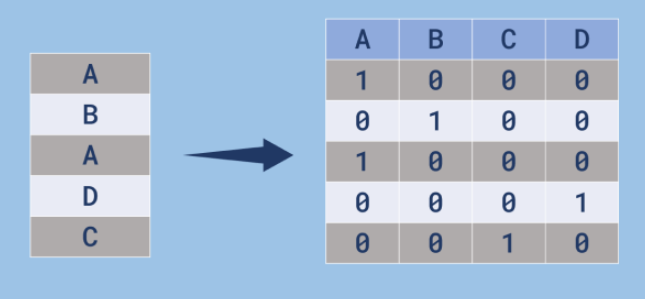

In [174]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [175]:
x = dados.drop('aderencia_investimento', axis=1)
y = dados['aderencia_investimento']

In [176]:
one_hot = OneHotEncoder(drop =  'if_binary')
transformer = make_column_transformer((one_hot, ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']),
                                      remainder='passthrough',
                                      sparse_threshold=0)
linhas = transformer.fit_transform(x)
colunas = transformer.get_feature_names_out()
x = pd.DataFrame(linhas, columns=colunas) #features x modificados
x.head()

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0


## Transformando a variável alvo

Assim como as variáveis explicativas, a variável alvo também precisa ser alterada para o formato numérico. Podemos representar uma variável alvo binária como 0 ou 1, onde 0 indica ausência da característica da variável e 1 representa a presença da característica.

In [177]:
from sklearn.preprocessing import LabelEncoder

In [178]:
y = label = LabelEncoder().fit_transform(y)
y

array([1, 1, 0, ..., 1, 1, 1])

In [179]:
y = pd.DataFrame(y, columns=['aderencia_investimento'])
y

,aderencia_investimento
0,1
1,1
2,0
3,1
4,1
...,...
1263,1
1264,1
1265,1
1266,1


# Ajustando modelos

## Dividindo os dados entre treino e teste

Para compreender se o modelo está de fato aprendendo com os dados, precisamos fazer uma separação dos dados entre treinamento e teste. Os dados de **treinamento** são usados para ajustar o modelo, enquanto os dados de **teste** servem para verificar o aprendizado do modelo em dados que não foram utilizados no momento do ajuste.

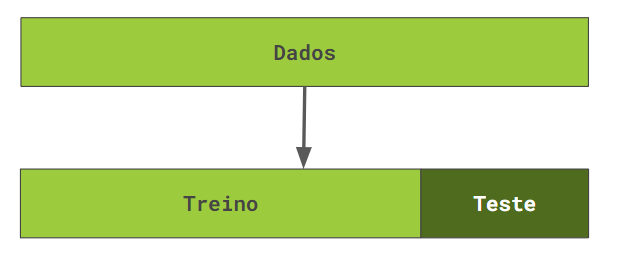

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
seed = 0
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state=seed, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

Treinaremos com 951 elementos e testaremos com 317 elementos


## Modelo de base

O modelo mais simples de classificar os dados é simplesmente utilizar um algoritmo que chuta todas as classificações para a classe que tem maior frequência. Esse algoritmo serve como um critério de comparação, para identificar se os outros modelos tem um desempenho melhor do que a classificação mais simples possível.

In [182]:
from sklearn.dummy import DummyClassifier

In [183]:
dummy = DummyClassifier()
dummy.fit(train_x, train_y)
dummy.score(test_x, test_y) #acurácia

0.6056782334384858

## Árvore de decisão

O modelo de árvore de decisão é muito utilizado pela sua alta **explicabilidade** e **processamento rápido**, mantendo um desempenho bem interessante.

Ele se baseia em decisões simples tomadas pelo algoritmo, separando os dados com base em comparações de **menor** e **maior** nos valores das colunas da base de dados.

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [185]:
arvore = DecisionTreeClassifier(max_depth=3, random_state=5)
arvore.fit(train_x, train_y)
arvore.score(test_x, test_y)

0.6908517350157729

```
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']
```

In [186]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']

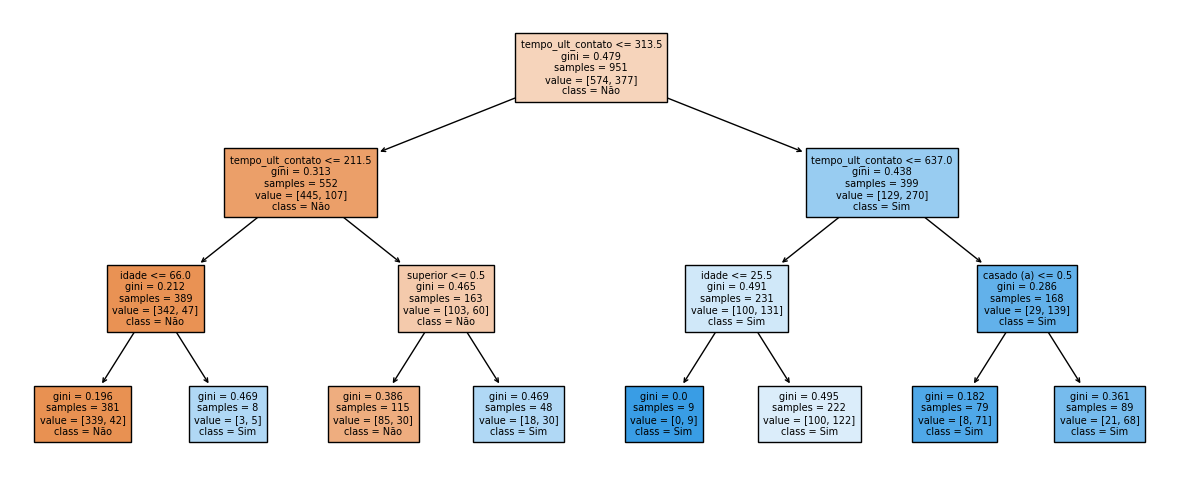

In [187]:
plt.figure(figsize=(15,6))
plot_tree(arvore, feature_names=nome_colunas, filled=True, class_names=['Não', 'Sim'], fontsize= 7)
plt.show()

# Seleção de modelos

## Normalizando os dados

Alguns algoritmos podem atribuir um peso maior aos valores das variáveis devido a escala dos valores e não pela importância da classificação da variável alvo. Por exemplo, em uma base de dados com a colunas **idade** e **salário**, o algoritmo pode dar um peso de decisão maior para os valores do salário simplesmente por estar em uma escala maior do que os valores de idade, e não porque a variável salário é mais importante do que a variável idade.

Nesses casos, precisamos fazer uma transformação nos dados para que fiquem em uma mesma escala, fazendo com que o algoritmo não seja influenciado incorretamente pelos valores numéricos divergentes entre as variáveis.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [188]:
from sklearn.preprocessing import MinMaxScaler

In [189]:
train_x_normalizado = MinMaxScaler().fit_transform(train_x)
test_x_normalizado = MinMaxScaler().fit_transform(test_x)

In [190]:
train_y

,aderencia_investimento
63,0
398,0
1096,1
282,0
140,1
...,...
1109,0
906,0
927,0
1211,1


## KNN

O algoritmo KNN se baseia no cálculo de distância entre os registros da base de dados e busca elementos que estejam próximos uns dos outros (vizinhos) para tomar a decisão da classificação.

Por conta de usar cálculos de distância, esse algoritmo é influenciado pela escala das variáveis e por conta disso é necessário uma transformação nos dados antes de utilizar esse método.

In [191]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_x_normalizado, train_y)
knn.score(test_x_normalizado, test_y)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.7066246056782335

## Escolhendo e salvando o melhor modelo


Ao final de um projeto de machine learning, devemos comparar os resultados dos modelos e escolher aquele que tenha o melhor desempenho.


In [192]:
print(f'Acurácia da árvore de decisão: {arvore.score(test_x, test_y)}')
print(f'Acurácia do KNN: {knn.score(test_x_normalizado, test_y)}')
print(f'Acurácia do Dummy: {dummy.score(test_x, test_y)}')

Acurácia da árvore de decisão: 0.6908517350157729
Acurácia do KNN: 0.7066246056782335
Acurácia do Dummy: 0.6056782334384858


## Pickle Dump


Podemos armazenar o modelo em um arquivo serializado do tipo pickle para que seja utilizado em produção, ou seja, em dados do mundo real para atender as necessidades do problema que precisa ser resolvido.

In [193]:
import pickle

In [194]:
#exportar o modelo knn
#exportar no modelo one hot code

In [195]:
with open('knn.pkl', 'wb') as arquivo:
    pickle.dump(knn, arquivo)

In [196]:
with open('one_hot.pkl', 'wb') as onehot:
    pickle.dump(transformer, onehot)

## Usando o modelo

In [197]:
modelo_knn = pd.read_pickle('knn.pkl')
modelo_onehot = pd.read_pickle('one_hot.pkl')

In [198]:
novo_cliente = {
    'idade': [45],
    'estado_civil': 'solteiro (a)',
    'escolaridade': 'superior',
    'inadimplencia': 'nao',
    'fez_emprestimo': 'sim',
    'saldo': [23040],
    'tempo_ult_contato': [4],
    'numero_contatos': [2]
}

In [199]:
pd.DataFrame(novo_cliente)

,idade,estado_civil,escolaridade,inadimplencia,fez_emprestimo,saldo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,sim,23040,4,2


In [200]:
novo_clente = modelo_onehot.transform(pd.DataFrame(novo_cliente))
modelo_knn.predict(novo_clente)

array([0])